In [1]:
import os
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix
)

In [2]:
# GANTI SESUAI DRIVE KAMU
EXTERNAL_DIR = "/content/drive/MyDrive/semester 7/Skripsi/dataset/Banana_Leaf_Disease_Dataset_Bangladesh"

MODEL_DIR = "/content/drive/MyDrive/semester 7/Skripsi/models/all"

CLASS_NAMES = ['cordana', 'healthy', 'pestalotiopsis', 'sigatoka']
IMG_SIZE = (224, 224)
BATCH_SIZE = 32


In [3]:
external_ds = tf.keras.utils.image_dataset_from_directory(
    EXTERNAL_DIR,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    label_mode="categorical",
    shuffle=False,
    class_names=CLASS_NAMES
).prefetch(tf.data.AUTOTUNE)

print("Dataset luar loaded.")


Found 424 files belonging to 4 classes.
Dataset luar loaded.


In [4]:
model_configs = {
    "MobileNetV2_FE": "mobilenetv2_fixedfeature.keras",
    "MobileNetV2_FT10": "mobilenetv2_ft10.keras",
    "MobileNetV2_FT20": "mobilenetv2_ft20.keras",
    "MobileNetV2_FT30": "mobilenetv2_ft30.keras",

    "EfficientNetB0_FE": "efficientnetb0_fixedfeature.keras",
    "EfficientNetB0_FT10": "efficientnetb0_ft10.keras",
    "EfficientNetB0_FT20": "efficientnetb0_ft20.keras",
    "EfficientNetB0_FT30": "efficientnetb0_ft30.keras",
}

In [5]:
def evaluate_model(model, dataset):
    y_true, y_pred = [], []

    for x, y in dataset:
        preds = model.predict(x, verbose=0)
        y_true.extend(np.argmax(y.numpy(), axis=1))
        y_pred.extend(np.argmax(preds, axis=1))

    y_true = np.array(y_true)
    y_pred = np.array(y_pred)

    metrics = {
        "Accuracy": accuracy_score(y_true, y_pred),
        "Macro Precision": precision_score(y_true, y_pred, average="macro"),
        "Macro Recall": recall_score(y_true, y_pred, average="macro"),
        "Macro F1": f1_score(y_true, y_pred, average="macro"),
        "Confusion Matrix": confusion_matrix(y_true, y_pred)
    }

    return metrics

In [10]:
results = []
conf_matrices = {}

for model_name, file_name in model_configs.items():
    print(f"\nEvaluating {model_name} ...")

    model_path = os.path.join(MODEL_DIR, file_name)
    model = tf.keras.models.load_model(model_path, compile=False)

    metrics = evaluate_model(model, external_ds)

    results.append({
        "Model": model_name,
        "Accuracy": metrics["Accuracy"],
        "Macro Precision": metrics["Macro Precision"],
        "Macro Recall": metrics["Macro Recall"],
        "Macro F1": metrics["Macro F1"]
    })

    conf_matrices[model_name] = metrics["Confusion Matrix"]

results_df = pd.DataFrame(results)
display(results_df)



Evaluating MobileNetV2_FE ...

Evaluating MobileNetV2_FT10 ...

Evaluating MobileNetV2_FT20 ...

Evaluating MobileNetV2_FT30 ...

Evaluating EfficientNetB0_FE ...

Evaluating EfficientNetB0_FT10 ...

Evaluating EfficientNetB0_FT20 ...

Evaluating EfficientNetB0_FT30 ...


,Model,Accuracy,Macro Precision,Macro Recall,Macro F1
0,MobileNetV2_FE,0.372642,0.450162,0.371692,0.398652
1,MobileNetV2_FT10,0.448113,0.465561,0.445842,0.452761
2,MobileNetV2_FT20,0.464623,0.469371,0.464703,0.458879
3,MobileNetV2_FT30,0.419811,0.442156,0.422471,0.426071
4,EfficientNetB0_FE,0.504717,0.532983,0.511562,0.510972
5,EfficientNetB0_FT10,0.497642,0.538341,0.500793,0.513307
6,EfficientNetB0_FT20,0.507075,0.526388,0.514789,0.511977
7,EfficientNetB0_FT30,0.511792,0.540302,0.519426,0.515863


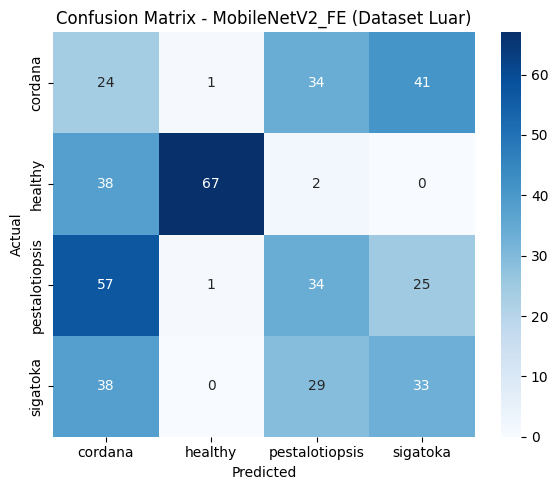

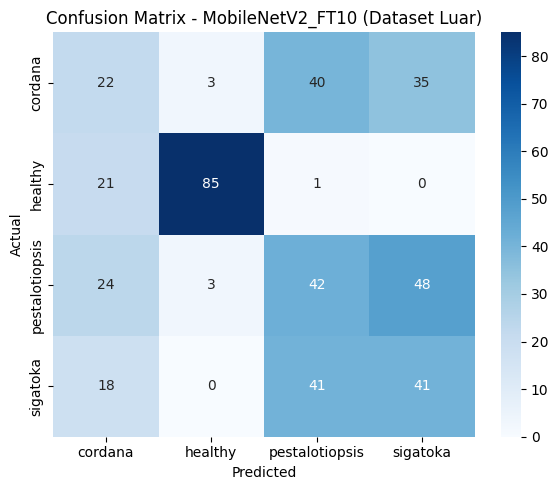

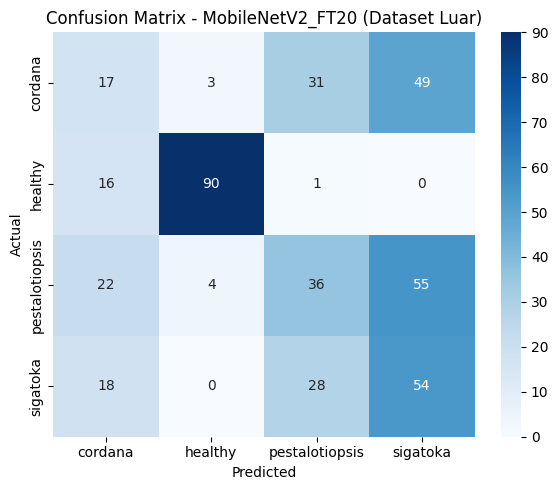

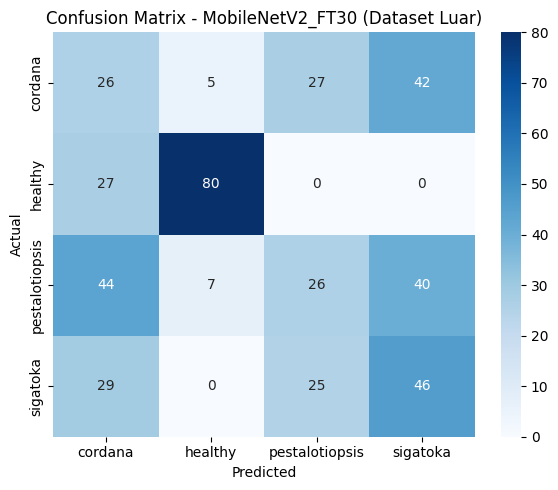

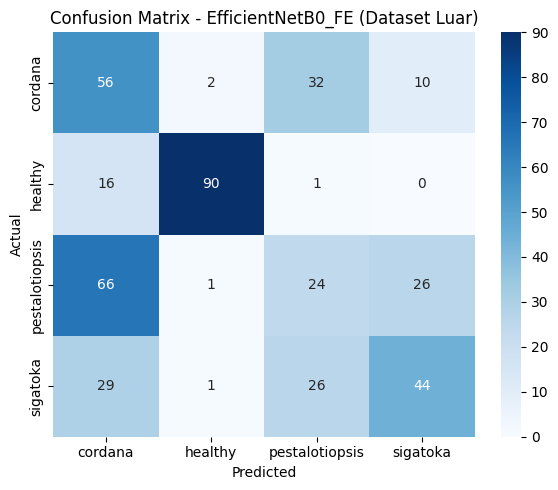

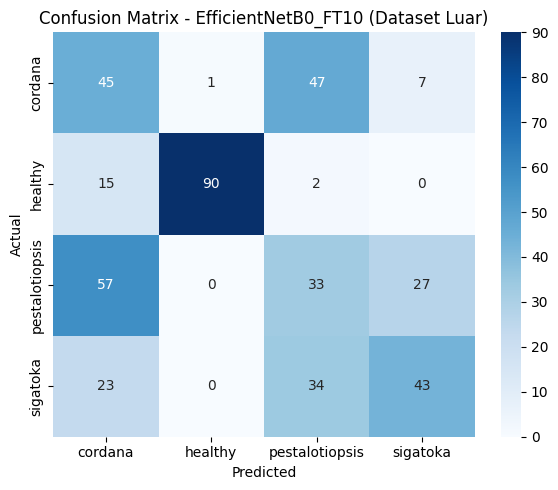

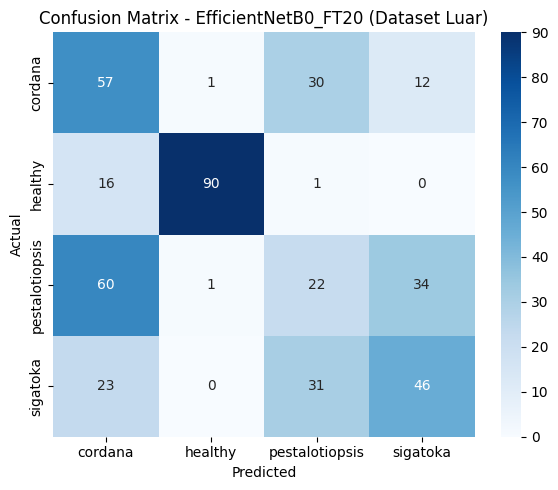

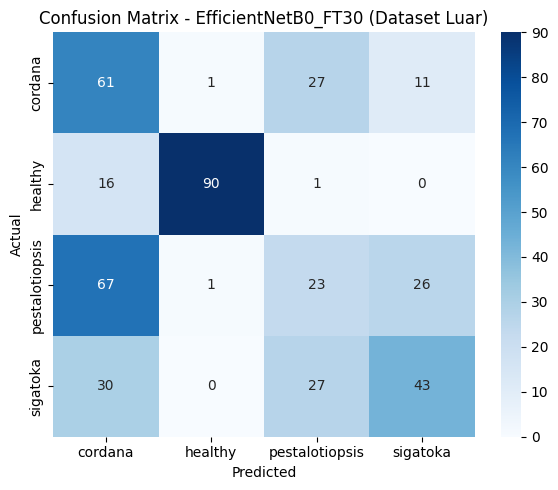

In [11]:
def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(6,5))
    sns.heatmap(
        cm,
        annot=True,
        fmt="d",
        cmap="Blues",
        xticklabels=CLASS_NAMES,
        yticklabels=CLASS_NAMES
    )
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(title)
    plt.tight_layout()
    plt.show()

for model_name, cm in conf_matrices.items():
    plot_confusion_matrix(
        cm,
        f"Confusion Matrix - {model_name} (Dataset Luar)"
    )


In [12]:
mobilenet_df = results_df[
    results_df["Model"].str.contains("MobileNetV2")
]

mobilenet_avg_df = pd.DataFrame({
    "Metric": ["Accuracy", "Macro Precision", "Macro Recall", "Macro F1"],
    "Average Value": [
        mobilenet_df["Accuracy"].mean(),
        mobilenet_df["Macro Precision"].mean(),
        mobilenet_df["Macro Recall"].mean(),
        mobilenet_df["Macro F1"].mean()
    ]
})

display(mobilenet_avg_df)


,Metric,Average Value
0,Accuracy,0.426297
1,Macro Precision,0.456812
2,Macro Recall,0.426177
3,Macro F1,0.434091


In [13]:
efficientnet_df = results_df[
    results_df["Model"].str.contains("EfficientNetB0")
]

efficientnet_avg_df = pd.DataFrame({
    "Metric": ["Accuracy", "Macro Precision", "Macro Recall", "Macro F1"],
    "Average Value": [
        efficientnet_df["Accuracy"].mean(),
        efficientnet_df["Macro Precision"].mean(),
        efficientnet_df["Macro Recall"].mean(),
        efficientnet_df["Macro F1"].mean()
    ]
})

display(efficientnet_avg_df)


,Metric,Average Value
0,Accuracy,0.505307
1,Macro Precision,0.534503
2,Macro Recall,0.511643
3,Macro F1,0.513030
